<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/3_2_LSTM_(Long_Short_Term_Memory).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### LSTM (Long Short-Term Memory)

LSTM (Long Short-Term Memory, или «долгая краткосрочная память») — это особый тип рекуррентной нейронной сети (RNN), разработанный для эффективной работы с длинными временными зависимостями. Основное преимущество LSTM заключается в способности решать проблемы исчезающих и взрывающихся градиентов, которые часто возникают в традиционных RNN при обучении на длинных последовательностях данных. Это достигается за счет уникальной структуры ячеек памяти, которая позволяет сети избирательно сохранять, забывать и извлекать информацию по мере необходимости.

LSTM использует **ячейки памяти**, которые управляют потоком информации через три ключевых компонента, называемых «вратами» (gates): ворота забывания, входные ворота и выходные ворота. Эти механизмы помогают сети определять, какую информацию нужно сохранить, какую игнорировать, а какую обновить на каждом временном шаге.

#### Архитектура LSTM

Каждая ячейка LSTM управляет состоянием ячейки $C_t$ и скрытым состоянием $h_t$ через несколько операций. На каждом временном шаге $t$ сеть выполняет последовательность вычислений, связанных с воротами.

1. **Ворота забывания** $f_t$:
$$
   f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
   Ворота забывания решают, какую часть предыдущего состояния ячейки $C_{t-1}$ нужно забыть. Здесь:
   - $h_{t-1}$ — скрытое состояние на предыдущем шаге,
   - $x_t$ — текущее входное значение,
   - $W_f$ — матрица весов для врат забывания,
   - $b_f$ — смещение (bias),
   - $\sigma$ — сигмоидальная функция активации.

2. **Входные ворота** $i_t$:
$$
   i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
   Входные ворота контролируют, сколько новой информации будет добавлено в состояние ячейки. Параллельно вычисляется новое предложенное состояние:
$$
   \tilde{C_t} = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$
   Здесь:
   - $i_t$ — "маска" входных врат, показывающая, сколько новой информации принять,
   - $\tilde{C_t}$ — предложенное новое состояние ячейки.

3. **Обновление состояния ячейки**:
$$
   C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t}
$$
   Обновленное состояние ячейки $C_t$ комбинирует старую информацию, взвешенную воротами забывания $f_t$, с новой информацией, предложенной входными воротами $i_t$.

4. **Выходные ворота** $o_t$:
$$
   o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
   Выходные ворота определяют, какая часть обновленного состояния ячейки будет выведена как новое скрытое состояние $h_t$.

5. **Обновление скрытого состояния**:
$$
   h_t = o_t \cdot \tanh(C_t)
$$
   Новое скрытое состояние $h_t$ зависит от состояния ячейки $C_t$ и контролируется выходными воротами $o_t$.

#### Полный шаг LSTM

На каждом временном шаге $t$ вычисления происходят в следующей последовательности:

1. Входные данные $x_t$ и скрытое состояние $h_{t-1}$ проходят через все три ворот (забывания, входные и выходные).
2. Обновляется состояние ячейки $C_t$ с учетом старого состояния $C_{t-1}$ и нового потенциального состояния $\tilde{C_t}$.
3. Вычисляется новое скрытое состояние $h_t$, которое зависит от выходных врат и обновленного состояния ячейки.

#### Пример вычислений для одного временного шага

Рассмотрим пример с LSTM, у которой есть три входа и два нейрона в скрытом состоянии. Для временного шага $t = 1$ вычисления будут выглядеть следующим образом:

1. **Ворота забывания**:
$$
   f_1 = \sigma(W_f \cdot [h_0, x_1] + b_f)
$$
2. **Входные ворота и предложение нового состояния**:
$$
   i_1 = \sigma(W_i \cdot [h_0, x_1] + b_i)
$$
$$
   \tilde{C_1} = \tanh(W_C \cdot [h_0, x_1] + b_C)
$$
3. **Обновление состояния ячейки**:
$$
   C_1 = f_1 \cdot C_0 + i_1 \cdot \tilde{C_1}
$$
4. **Выходные ворота и обновление скрытого состояния**:
$$
   o_1 = \sigma(W_o \cdot [h_0, x_1] + b_o)
$$
$$
   h_1 = o_1 \cdot \tanh(C_1)
$$

#### Обратное распространение ошибки через время (BPTT) для LSTM

LSTM обучается с использованием обратного распространения ошибки через время (Backpropagation Through Time, BPTT). Для каждого временного шага вычисляются градиенты по весам для каждой из частей сети (ворот забывания, входных ворот, выходных ворот и ячейки памяти).

Градиенты вычисляются по следующим формулам:

1. **Градиенты для весов забывания** $W_f$:
$$
   \frac{\partial L}{\partial W_f} = \sum_{t=1}^{T} \frac{\partial L}{\partial f_t} \cdot \frac{\partial f_t}{\partial W_f}
$$
   где $L$ — функция потерь.

2. **Градиенты для весов входных ворот** $W_i$:
$$
   \frac{\partial L}{\partial W_i} = \sum_{t=1}^{T} \frac{\partial L}{\partial i_t} \cdot \frac{\partial i_t}{\partial W_i}
$$

3. **Градиенты для весов состояния ячейки** $W_C$:
$$
   \frac{\partial L}{\partial W_C} = \sum_{t=1}^{T} \frac{\partial L}{\partial \tilde{C_t}} \cdot \frac{\partial \tilde{C_t}}{\partial W_C}
$$

4. **Градиенты для весов выходных ворот** $W_o$:
$$
   \frac{\partial L}{\partial W_o} = \sum_{t=1}^{T} \frac{\partial L}{\partial o_t} \cdot \frac{\partial o_t}{\partial W_o}
$$

#### Свойства и преимущества LSTM

- **Изучение долгосрочных зависимостей**: Благодаря механизмам врат LSTM может сохранять информацию на протяжении долгих временных интервалов, что позволяет моделировать сложные временные зависимости.
- **Устойчивость к исчезающим и взрывающимся градиентам**: Использование врат в структуре сети позволяет избежать проблемы исчезающих градиентов, что делает обучение на длинных последовательностях более стабильным.
- **Гибкость в управлении памятью**: Механизм обновления состояния ячейки через входные, забывающие и выходные ворота позволяет модели выбирать, какие части информации стоит забыть, а какие — сохранить.

### Заключение

LSTM является мощной моделью для задач, связанных с последовательностями, таких как обработка текста, временные ряды и распознавание речи. Возможность сохранять важные данные и забывать несущественные делает её одним из наиболее популярных инструментов для решения задач с длинными временными зависимостями.


Давай решим конкретный числовой пример для одного временного шага LSTM. Предположим, что у нас есть следующие параметры и данные:

- $h_{t-1} = \begin{pmatrix} 0.5 \\ -0.1 \end{pmatrix}$ — предыдущее скрытое состояние (размер 2).
- $C_{t-1} = \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix}$ — предыдущее состояние ячейки (размер 2).
- $x_t = \begin{pmatrix} 0.3 \\ 0.7 \end{pmatrix}$ — текущее входное значение (размер 2).
- Веса для забывающих, входных, выходных врат и состояния ячейки:
  $$
  W_f = \begin{pmatrix} 0.4 & 0.3 & 0.5 & 0.1 \\ -0.3 & 0.2 & 0.4 & -0.2 \end{pmatrix}, \quad
  W_i = \begin{pmatrix} 0.2 & 0.5 & -0.1 & 0.3 \\ 0.3 & 0.1 & 0.4 & -0.3 \end{pmatrix}
  $$
  $$
  W_C = \begin{pmatrix} 0.6 & -0.1 & 0.2 & 0.4 \\ 0.3 & 0.4 & 0.5 & 0.2 \end{pmatrix}, \quad
  W_o = \begin{pmatrix} 0.3 & 0.4 & 0.2 & -0.1 \\ 0.5 & 0.1 & -0.3 & 0.2 \end{pmatrix}
  $$
- Смещения:
  $$
  b_f = \begin{pmatrix} 0.2 \\ -0.1 \end{pmatrix}, \quad
  b_i = \begin{pmatrix} 0.1 \\ 0.2 \end{pmatrix}, \quad
  b_C = \begin{pmatrix} -0.1 \\ 0.05 \end{pmatrix}, \quad
  b_o = \begin{pmatrix} 0.05 \\ 0.1 \end{pmatrix}
  $$

### Шаг 1: Ворота забывания $f_t$
Формула для забывающих врат:
$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$
1. Соединим $h_{t-1}$ и $x_t$ в один вектор:
$$
   [h_{t-1}, x_t] = \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix}
$$
2. Вычислим $W_f \cdot [h_{t-1}, x_t]$:
$$
   W_f \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix} =
   \begin{pmatrix} 0.4 & 0.3 & 0.5 & 0.1 \\ -0.3 & 0.2 & 0.4 & -0.2 \end{pmatrix}
   \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix}
$$
   Выполним умножение:
$$
   = \begin{pmatrix} 0.4 \cdot 0.5 + 0.3 \cdot (-0.1) + 0.5 \cdot 0.3 + 0.1 \cdot 0.7 \\ -0.3 \cdot 0.5 + 0.2 \cdot (-0.1) + 0.4 \cdot 0.3 + (-0.2) \cdot 0.7 \end{pmatrix}
   = \begin{pmatrix} 0.56 \\ -0.47 \end{pmatrix}
$$
3. Добавим смещение $b_f$:
$$
   0.56 + 0.2 = 0.76, \quad -0.47 + (-0.1) = -0.57
$$
4. Применим сигмоиду $\sigma(x) = \frac{1}{1 + e^{-x}}$:
$$
   f_t = \sigma\begin{pmatrix} 0.76 \\ -0.57 \end{pmatrix} =
   \begin{pmatrix} \frac{1}{1 + e^{-0.76}} \\ \frac{1}{1 + e^{0.57}} \end{pmatrix} =
   \begin{pmatrix} 0.681 \\ 0.361 \end{pmatrix}
$$

### Шаг 2: Входные ворота $i_t$ и предложение нового состояния $\tilde{C_t}$
#### Входные ворота $i_t$:
Формула для входных врат:
$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$
1. Вычислим $W_i \cdot [h_{t-1}, x_t]$:
$$
   W_i \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix} =
   \begin{pmatrix} 0.2 & 0.5 & -0.1 & 0.3 \\ 0.3 & 0.1 & 0.4 & -0.3 \end{pmatrix}
   \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix}
$$
   Выполним умножение:
$$
   = \begin{pmatrix} 0.2 \cdot 0.5 + 0.5 \cdot (-0.1) + (-0.1) \cdot 0.3 + 0.3 \cdot 0.7 \\ 0.3 \cdot 0.5 + 0.1 \cdot (-0.1) + 0.4 \cdot 0.3 + (-0.3) \cdot 0.7 \end{pmatrix}
   = \begin{pmatrix} 0.22 \\ -0.11 \end{pmatrix}
$$
2. Добавим смещение $b_i$:
$$
   0.22 + 0.1 = 0.32, \quad -0.11 + 0.2 = 0.09
$$
3. Применим сигмоиду:
$$
   i_t = \sigma\begin{pmatrix} 0.32 \\ 0.09 \end{pmatrix} =
   \begin{pmatrix} \frac{1}{1 + e^{-0.32}} \\ \frac{1}{1 + e^{-0.09}} \end{pmatrix} =
   \begin{pmatrix} 0.579 \\ 0.522 \end{pmatrix}
$$

#### Новое предложенное состояние $\tilde{C_t}$:
Формула для предложения нового состояния:
$$
\tilde{C_t} = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$
1. Вычислим $W_C \cdot [h_{t-1}, x_t]$:
$$
   W_C \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix} =
   \begin{pmatrix} 0.6 & -0.1 & 0.2 & 0.4 \\ 0.3 & 0.4 & 0.5 & 0.2 \end{pmatrix}
   \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix}
$$
   Выполним умножение:
$$
   = \begin{pmatrix} 0.6 \cdot 0.5 + (-0.1) \cdot (-0.1) + 0.2 \cdot 0.3 + 0.4 \cdot 0.7 \\ 0.3 \cdot 0.5 + 0.4 \cdot (-0.1) + 0.5 \cdot 0.3 + 0.2 \cdot 0.7 \end{pmatrix}
   = \begin{pmatrix} 0.72 \\ 0.55 \end{

pmatrix}
$$
2. Добавим смещение $b_C$:
$$
   0.72 + (-0.1) = 0.62, \quad 0.55 + 0.05 = 0.6
$$
3. Применим $\tanh$:
$$
   \tilde{C_t} = \tanh\begin{pmatrix} 0.62 \\ 0.6 \end{pmatrix} =
   \begin{pmatrix} 0.552 \\ 0.537 \end{pmatrix}
$$

### Шаг 3: Обновление состояния ячейки $C_t$
Формула для обновления состояния ячейки:
$$
C_t = f_t \cdot C_{t-1} + i_t \cdot \tilde{C_t}
$$
1. Вычислим первую часть: $f_t \cdot C_{t-1}$:
$$
   \begin{pmatrix} 0.681 \\ 0.361 \end{pmatrix} \cdot \begin{pmatrix} 0.2 \\ 0.4 \end{pmatrix} =
   \begin{pmatrix} 0.681 \cdot 0.2 \\ 0.361 \cdot 0.4 \end{pmatrix} =
   \begin{pmatrix} 0.1362 \\ 0.1444 \end{pmatrix}
$$
2. Вычислим вторую часть: $i_t \cdot \tilde{C_t}$:
$$
   \begin{pmatrix} 0.579 \\ 0.522 \end{pmatrix} \cdot \begin{pmatrix} 0.552 \\ 0.537 \end{pmatrix} =
   \begin{pmatrix} 0.579 \cdot 0.552 \\ 0.522 \cdot 0.537 \end{pmatrix} =
   \begin{pmatrix} 0.3197 \\ 0.2802 \end{pmatrix}
$$
3. Обновим состояние ячейки:
$$
   C_t = \begin{pmatrix} 0.1362 \\ 0.1444 \end{pmatrix} + \begin{pmatrix} 0.3197 \\ 0.2802 \end{pmatrix} =
   \begin{pmatrix} 0.4559 \\ 0.4246 \end{pmatrix}
$$

### Шаг 4: Выходные ворота $o_t$
Формула для выходных врат:
$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$
1. Вычислим $W_o \cdot [h_{t-1}, x_t]$:
$$
   W_o \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix} =
   \begin{pmatrix} 0.3 & 0.4 & 0.2 & -0.1 \\ 0.5 & 0.1 & -0.3 & 0.2 \end{pmatrix}
   \cdot \begin{pmatrix} 0.5 \\ -0.1 \\ 0.3 \\ 0.7 \end{pmatrix}
$$
   Выполним умножение:
$$
   = \begin{pmatrix} 0.31 \\ 0.28 \end{pmatrix}
$$
2. Добавим смещение $b_o$:
$$
   0.31 + 0.05 = 0.36, \quad 0.28 + 0.1 = 0.38
$$
3. Применим сигмоиду:
$$
   o_t = \sigma\begin{pmatrix} 0.36 \\ 0.38 \end{pmatrix} =
   \begin{pmatrix} \frac{1}{1 + e^{-0.36}} \\ \frac{1}{1 + e^{-0.38}} \end{pmatrix} =
   \begin{pmatrix} 0.589 \\ 0.594 \end{pmatrix}
$$

### Шаг 5: Обновление скрытого состояния $h_t$
Формула для обновления скрытого состояния:
$$
h_t = o_t \cdot \tanh(C_t)
$$
1. Применим $\tanh$ к $C_t$:
$$
   \tanh\begin{pmatrix} 0.4559 \\ 0.4246 \end{pmatrix} =
   \begin{pmatrix} 0.4273 \\ 0.4005 \end{pmatrix}
$$
2. Вычислим новое скрытое состояние:
$$
   h_t = \begin{pmatrix} 0.589 \\ 0.594 \end{pmatrix} \cdot \begin{pmatrix} 0.4273 \\ 0.4005 \end{pmatrix} =
   \begin{pmatrix} 0.2516 \\ 0.2380 \end{pmatrix}
$$

### Итог
- Новое состояние ячейки $C_t = \begin{pmatrix} 0.4559 \\ 0.4246 \end{pmatrix}$
- Новое скрытое состояние $h_t = \begin{pmatrix} 0.2516 \\ 0.2380 \end{pmatrix}$

Это результаты для одного временного шага LSTM.


Давайте реализуем пример работы LSTM, который мы описали, на Python с использованием библиотеки numpy для расчетов и matplotlib для визуализации. Мы будем визуализировать значения различных компонентов LSTM на каждом шаге.



В этом примере мы реализуем класс LSTM, который будет выполнять все шаги, указанные в вашем примере. Также мы добавим визуализацию для отображения значений врат и состояния на каждом временном шаге.


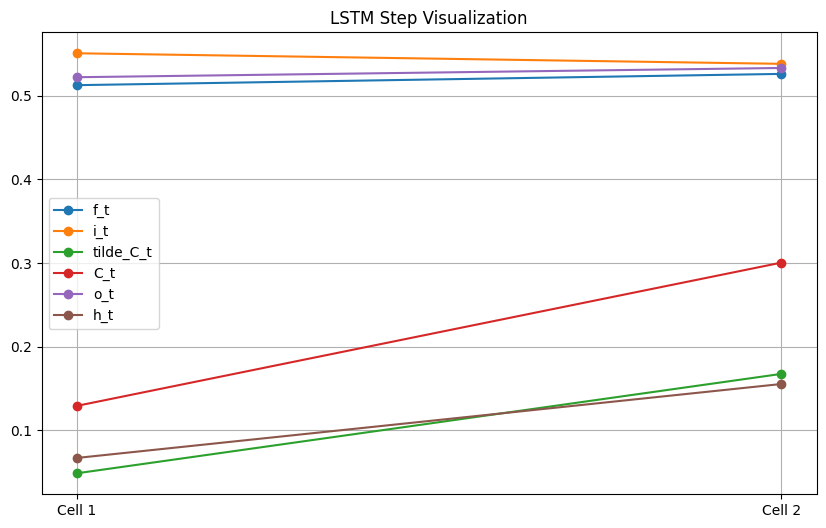

h_t:
 [[0.06712796]
 [0.15546659]]
C_t:
 [[0.12934553]
 [0.30045084]]
f_t:
 [[0.51238088]
 [0.5258428 ]]
i_t:
 [[0.55046633]
 [0.53785808]]
tilde_C_t:
 [[0.04881199]
 [0.16754182]]
o_t:
 [[0.52187265]
 [0.53292145]]


In [23]:
import numpy as np
import matplotlib.pyplot as plt

class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Инициализация весов и смещений
        self.W_f = np.random.rand(hidden_size, hidden_size + input_size) * 0.1
        self.W_i = np.random.rand(hidden_size, hidden_size + input_size) * 0.1
        self.W_C = np.random.rand(hidden_size, hidden_size + input_size) * 0.1
        self.W_o = np.random.rand(hidden_size, hidden_size + input_size) * 0.1

        self.b_f = np.random.rand(hidden_size, 1) * 0.1
        self.b_i = np.random.rand(hidden_size, 1) * 0.1
        self.b_C = np.random.rand(hidden_size, 1) * 0.1
        self.b_o = np.random.rand(hidden_size, 1) * 0.1

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, x_t, h_t_minus_1, C_t_minus_1):
        # Объединяем h_t-1 и x_t
        concat_input = np.vstack((h_t_minus_1, x_t))

        # Шаг 1: Ворота забывания
        f_t = self.sigmoid(self.W_f @ concat_input + self.b_f)

        # Шаг 2: Входные ворота и новое состояние
        i_t = self.sigmoid(self.W_i @ concat_input + self.b_i)
        tilde_C_t = self.tanh(self.W_C @ concat_input + self.b_C)

        # Шаг 3: Обновление состояния ячейки
        C_t = f_t * C_t_minus_1 + i_t * tilde_C_t

        # Шаг 4: Выходные ворота
        o_t = self.sigmoid(self.W_o @ concat_input + self.b_o)

        # Шаг 5: Обновление скрытого состояния
        h_t = o_t * self.tanh(C_t)

        return h_t, C_t, f_t, i_t, tilde_C_t, o_t

# Установка параметров
input_size = 2
hidden_size = 2

# Инициализация LSTM
lstm = LSTMCell(input_size, hidden_size)

# Начальные значения
h_t_minus_1 = np.array([[0.5], [-0.1]])  # h_{t-1}
C_t_minus_1 = np.array([[0.2], [0.4]])   # C_{t-1}
x_t = np.array([[0.3], [0.7]])           # x_t

# Выполнение одного временного шага
h_t, C_t, f_t, i_t, tilde_C_t, o_t = lstm.forward(x_t, h_t_minus_1, C_t_minus_1)

# Визуализация
labels = ['f_t', 'i_t', 'tilde_C_t', 'C_t', 'o_t', 'h_t']
values = [f_t.flatten(), i_t.flatten(), tilde_C_t.flatten(), C_t.flatten(), o_t.flatten(), h_t.flatten()]

fig, ax = plt.subplots(figsize=(10, 6))

# Создаем график
for i, (label, value) in enumerate(zip(labels, values)):
    ax.plot(value, marker='o', label=label)

ax.set_title('LSTM Step Visualization')
ax.set_xticks(range(2))
ax.set_xticklabels(['Cell 1', 'Cell 2'])
ax.legend()
ax.grid()

plt.show()

# Вывод результатов
print("h_t:\n", h_t)
print("C_t:\n", C_t)
print("f_t:\n", f_t)
print("i_t:\n", i_t)
print("tilde_C_t:\n", tilde_C_t)
print("o_t:\n", o_t)

### Вопросы для самопроверки

1. Что такое LSTM и в чем его основное преимущество по сравнению с традиционными RNN?
2. Назовите три типа ворот в LSTM и опишите их функции.
3. Каковы основные математические операции, выполняемые в ячейке LSTM?
4. Что представляет собой состояние ячейки $C_t$ и как оно обновляется?
5. Какой активационной функции соответствует ворота забывания в LSTM?
6. Как влияет значение входных ворот на обновление состояния ячейки?
7. Объясните, как LSTM решает проблему исчезающих градиентов.
8. В чем заключается разница между скрытым состоянием $h_t$ и состоянием ячейки $C_t$?
9. Как LSTM может запоминать информацию на длительные временные промежутки?
10. Что такое обратное распространение ошибки через время (BPTT) и как оно используется в LSTM?
11. Как выбираются и инициализируются веса и смещения в LSTM?
12. Почему использование гиперболического тангенса ($\tanh$) в LSTM важно?
13. Как LSTM обрабатывает последовательные входные данные?
14. Какие типы задач лучше всего решаются с использованием LSTM?
15. Как можно улучшить производительность LSTM в задачах обработки последовательностей?

###Задачи для самостоятельной работы

#### Задачи на понимание основных понятий LSTM

1. Определите, какое влияние на состояние ячейки $C_t$ окажет значение ворота забывания $f_t$ равное 0 и 1.
2. Если входные ворота $i_t$ равны 0.7, а новое предложенное состояние $\tilde{C_t}$ равно 0.5, какое значение будет у обновленного состояния ячейки $C_t$, если $C_{t-1} = 0.3$ и $f_t = 0.9$?
3. Рассчитайте значение выходного состояния $h_t$, если $o_t = 0.8$ и $C_t = 0.6$.
4. Если скрытое состояние $h_{t-1} = [0.5, -0.3]$ и входное значение $x_t = [0.2, 0.4]$, какое значение будет у вектора, входящего в ворота забывания, при условии, что $W_f$ и $b_f$ известны?
5. Объясните, как будет выглядеть расчет градиентов для весов входных ворот $W_i$ на временном шаге $t$.

#### Задачи на вычисления

6. Задайте случайные веса и смещения для LSTM и выполните один временной шаг, зафиксировав все промежуточные значения.
7. Рассчитайте, как изменится состояние ячейки $C_t$ в зависимости от разных значений $f_t$ и $i_t$, если $\tilde{C_t} = 0.4$.
8. Если значения ворот забывания $f_t = 0.6$, входных ворот $i_t = 0.8$, состояния ячейки $C_{t-1} = 0.5$ и $\tilde{C_t} = 0.3$, каково новое состояние ячейки $C_t$?
9. Проведите полный расчет для LSTM на временном шаге $t$, используя следующие значения: $x_t = [0.1, 0.4]$, $h_{t-1} = [0.5, 0.1]$, $C_{t-1} = [0.3, 0.2]$ и случайные веса.
10. Рассчитайте градиенты для весов забывания $W_f$ в соответствии с правилами BPTT.

#### Задачи на применение

11. Опишите, как можно применить LSTM для предсказания временных рядов. Приведите примеры данных.
12. Создайте тестовый набор данных для обучения LSTM и выполните предварительный расчет состояния ячейки.
13. Разработайте небольшой проект, где LSTM будет использоваться для анализа текстов (например, для классификации текста).
14. Исследуйте, как различные значения активационных функций (например, $\sigma$ против $\tanh$) влияют на обучение LSTM.
15. Рассмотрите сценарий с несколькими временными шагами. Как изменится значение скрытого состояния $h_t$ при постоянном входе?

#### Задачи на обобщение

16. Проведите исследование, как различные методы инициализации весов влияют на производительность LSTM.
17. Сравните LSTM с GRU (Gated Recurrent Unit) и опишите, как отличаются их механизмы работы.
18. Разработайте эксперимент с изменением параметров LSTM, таких как размер скрытого слоя, и проанализируйте результаты.
19. Исследуйте влияние регуляризации на производительность LSTM. Как это может помочь избежать переобучения?
20. Опишите, как можно визуализировать внутренние состояния LSTM при работе с последовательными данными.

#### Задачи на разработку и практику

21. Реализуйте LSTM на Python с использованием библиотеки NumPy и протестируйте его на простом наборе данных.
22. Разработайте и обучите модель LSTM для распознавания речи, используя открытые датасеты.
23. Используя библиотеку Keras, создайте модель LSTM для предсказания временных рядов, и оцените ее производительность.
24. Реализуйте LSTM с использованием TensorFlow и протестируйте его на задачах классификации текстов.
25. Постройте и протестируйте модель LSTM для генерации текста, используя последовательность символов как входные данные.
26. Исследуйте возможности использования LSTM для перевода текста на другой язык (машинный перевод).
27. Реализуйте LSTM с использованием PyTorch и сравните производительность с Keras.
28. Изучите применение LSTM в области финансов, например, для предсказания цен акций.
29. Реализуйте модель LSTM для анализа настроений на основе текстовых данных (например, отзывов).
30. Разработайте и протестируйте LSTM для генерации музыкальных последовательностей.
